## Name: Choo Tze Hsuen
## Admin Number: 220926F

## Dataset Chosen for Assignment: Wheat Seeds

This dataset contains the data about kernels belonging to **three 
different varieties of wheat: Kama, Rosa and Canadian,** 70 elements each, randomly 
selected for the experiment. The project objective is to **train an ML model to determine if type 
of wheat based on attributes of its kernel given in the dataset.** 

## Dataset Columns Description

1) **Area:** Area of wheat kernel
   
2) **Perimeter:** Perimeter of wheat kernel

3) **Compactness:** Compactness is calculated using the following formula: Compactness = 4* pi * Area/Perimeter^2

4) **Length:** Length of kernel

5) **Width:** Width of kernel

6) **AsymmetryCoeff:** Asymmetry coefficient of kernel

7) **Groove:** Length of kernel groove

8) **Type:** 1: Kama, 2: Rosa and 3: Canadian

## Import Libraries (Task 1 and 2)

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import math
from scipy.stats import skew

# Libraries to help with data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# check installed version
import pycaret
from pycaret.classification import *
import mlflow

# Check PyCaret version
print(pycaret.__version__)

3.3.2


## Task 1: Perform Exploratory Data Analysis

### Import Data

In [2]:
# Load data into a Pandas DataFrame
df = pd.read_csv('data/training/03_Wheat_Seeds.csv') 

In [3]:
# Display Top 5 rows of the Dataframe
df.head()

,Area,Perimeter,Compactness,Length,Width,AsymmetryCoeff,Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### Overview of Dataset

In [4]:
# Display a summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area            199 non-null    float64
 1   Perimeter       199 non-null    float64
 2   Compactness     199 non-null    float64
 3   Length          199 non-null    float64
 4   Width           199 non-null    float64
 5   AsymmetryCoeff  199 non-null    float64
 6   Groove          199 non-null    float64
 7   Type            199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [5]:
# Check for duplicates
df.duplicated().sum()

0

This dataset contains **199 entries and 8 columns, with no missing values and duplicate records.** The **target variable** for this assignment is **"Type",** while the remaining **7 columns will be considered as potential features.**

In [6]:
# Display descriptive statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,199.0,14.918744,2.919976,10.5900,12.3300,14.4300,17.4550,21.1800
Perimeter,199.0,14.595829,1.310445,12.4100,13.4700,14.3700,15.8050,17.2500
Compactness,199.0,0.870811,0.023320,0.8081,0.8571,0.8734,0.8868,0.9183
Length,199.0,5.643151,0.443593,4.8990,5.2670,5.5410,6.0020,6.6750
Width,199.0,3.265533,0.378322,2.6300,2.9545,3.2450,3.5645,4.0330
AsymmetryCoeff,199.0,3.699217,1.471102,0.7651,2.5700,3.6310,4.7990,8.3150
Groove,199.0,5.420653,0.492718,4.5190,5.0460,5.2280,5.8790,6.5500
Type,199.0,1.994975,0.813382,1.0000,1.0000,2.0000,3.0000,3.0000


`Key Descriptive Statistics Observations`

`1) Area`
- **Mean:** 14.92  
- **Minimum:** 10.59  
- **Maximum:** 21.18  
- **Standard Deviation:** 2.92  

`2) Perimeter`
- **Mean:** 14.60  
- **Minimum:** 12.41  
- **Maximum:** 17.25  
- **Standard Deviation:** 1.31  

`3) Compactness`
- **Mean:** 0.87  
- **Minimum:** 0.808  
- **Maximum:** 0.918  
- **Standard Deviation:** 0.023  

`4) Length`
- **Mean:** 5.64  
- **Minimum:** 4.90  
- **Maximum:** 6.68  
- **Standard Deviation:** 0.44  

`5) Width`
- **Mean:** 3.27  
- **Minimum:** 2.63  
- **Maximum:** 4.03  
- **Standard Deviation:** 0.38  

`6) AsymmetryCoeff`
- **Mean:** 3.70  
- **Minimum:** 0.77  
- **Maximum:** 8.32  
- **Standard Deviation:** 1.47  

`7) Groove`
- **Mean:** 5.42  
- **Minimum:** 4.52  
- **Maximum:** 6.55  
- **Standard Deviation:** 0.49  

`8) Type (Target)`
- **Minimum:** 1  
- **Maximum:** 3  

### Data Exploration

### Distribution of Target Variable (Type)

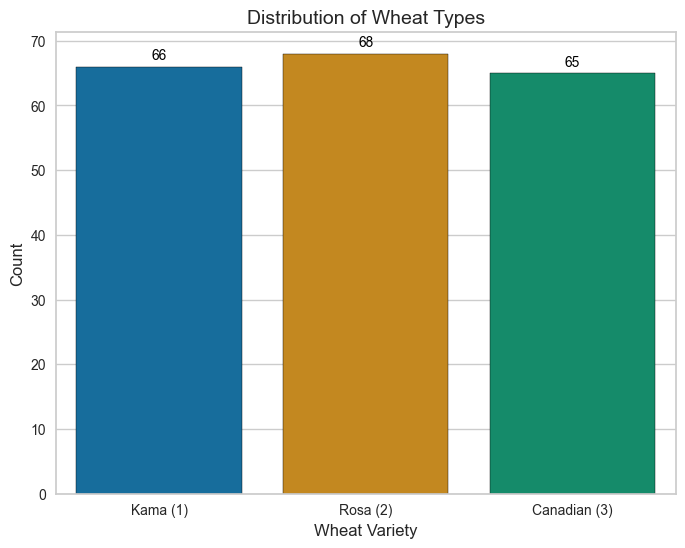

In [7]:
# Plot bar chart
plt.figure(figsize=(8, 6))
ax = sns.countplot(
    x="Type", 
    data=df, 
    hue="Type",                
    legend=False,             
    palette="colorblind", 
    edgecolor="black"
)

# Replace numeric ticks with wheat types
plt.xticks(ticks=[0, 1, 2], labels=["Kama (1)", "Rosa (2)", "Canadian (3)"])

# Data labels
for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),   
        (p.get_x() + p.get_width() / 2, p.get_height()), 
        ha="center", va="bottom", fontsize=10, color="black", xytext=(0, 3), 
        textcoords="offset points"
    )

# Labels and title
plt.xlabel("Wheat Variety", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Wheat Types", fontsize=14)

plt.show()

This bar chart illustrates the distribution of wheat types (target variable). The classes are **fairly balanced, with 66 Kama, 68 Rosa, and 65 Canadian samples.**

### Boxplot for Numerical Feature by Wheat Type

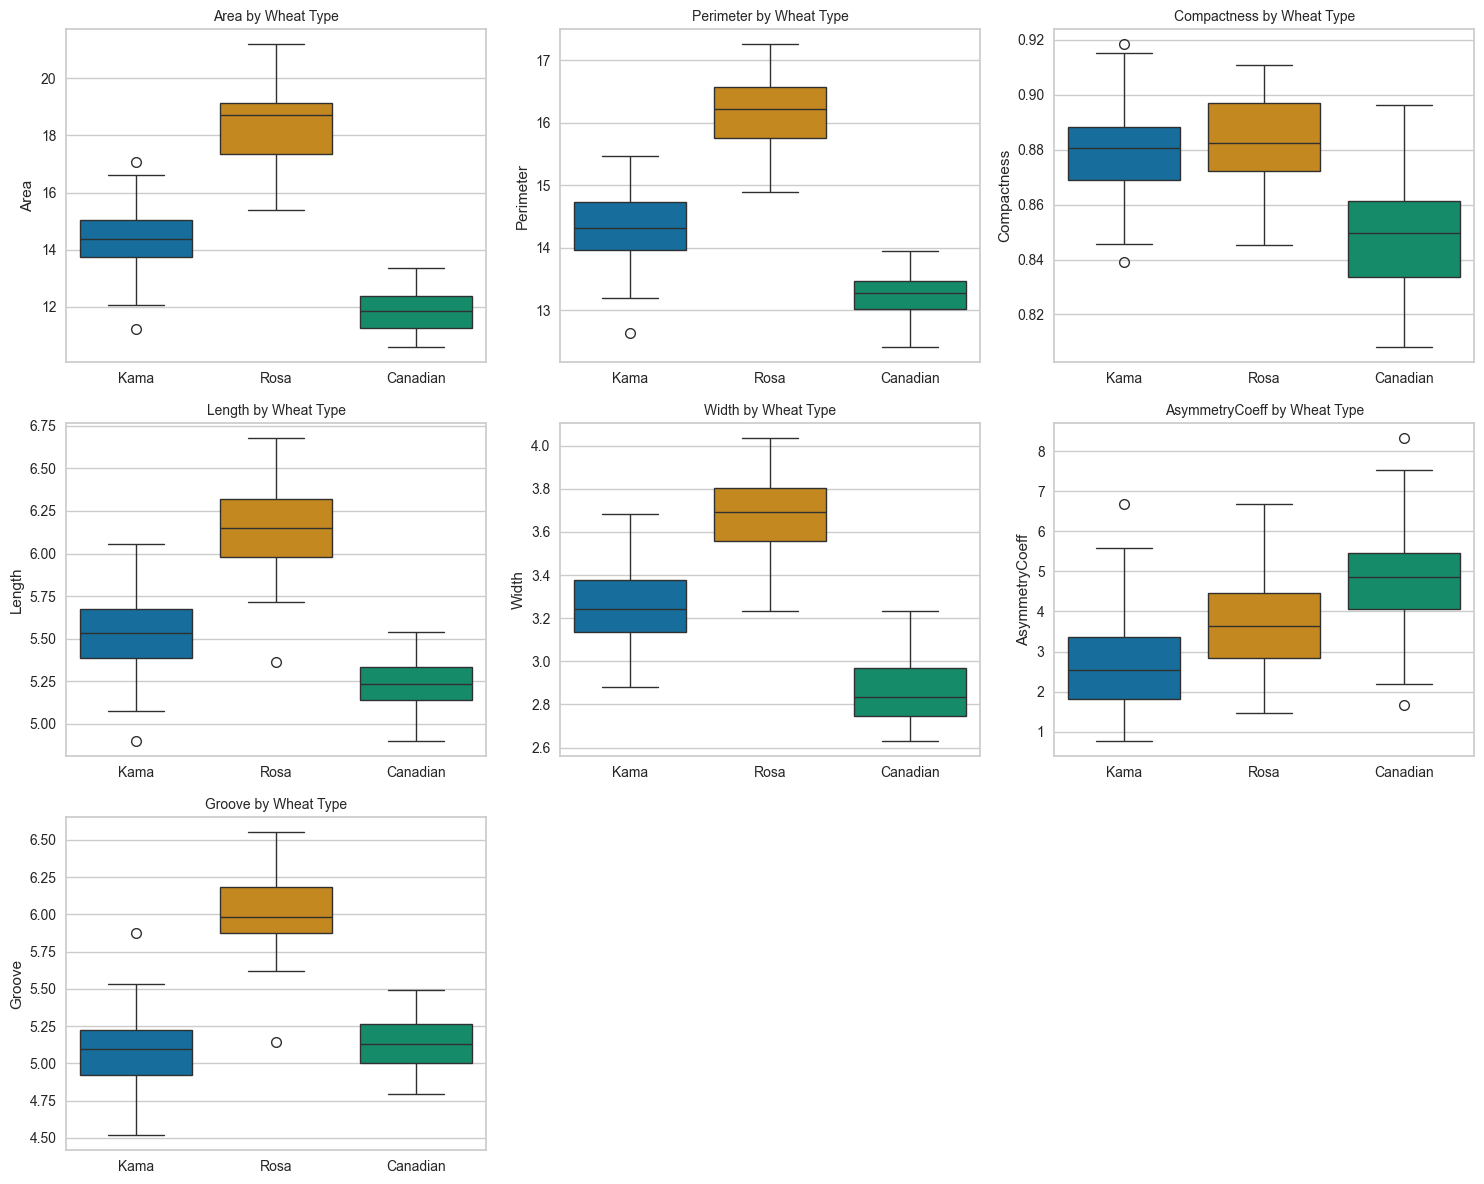

In [8]:
# Map Type codes to labels
df_temp = df.copy()
df_temp["Type"] = df_temp["Type"].map({1: "Kama", 2: "Rosa", 3: "Canadian"})

# Select numeric columns
numeric_cols = df_temp.select_dtypes(include=['float64', 'int64']).columns

# Set up subplot grid
rows = 3
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
axes = axes.flatten()  # Flatten for easy indexing

# Loop through numeric columns and plot
for i, col in enumerate(numeric_cols):
    sns.boxplot(
        data=df_temp,
        x='Type',
        y=col,
        hue='Type',          
        palette='colorblind',
        dodge=False,           
        ax=axes[i]
    )
    axes[i].set_xlabel('')    
    axes[i].set_ylabel(col)
    axes[i].set_title(f'{col} by Wheat Type', fontsize=10)
    
    # Remove redundant legend safely
    legend = axes[i].get_legend()
    if legend:
        legend.remove()

# Remove any empty subplots (if numeric_cols < rows*cols)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [9]:
# Map Type codes to labels
df_temp = df.copy()
df_temp["Type"] = df_temp["Type"].map({1: "Kama", 2: "Rosa", 3: "Canadian"})

# Select numeric columns (exclude Type)
numeric_cols = df_temp.select_dtypes(include=['float64', 'int64']).columns

# Initialise dictionary to store summaries
summary_dict = {}

# Loop through numeric columns
for col in numeric_cols:
    
    # Calculate descriptive stats grouped by Type
    summary = df_temp.groupby('Type')[col].describe(percentiles=[0.25, 0.5, 0.75])
    
    # Extract min, Q1, median, Q3, max
    quartiles_iqr = summary[['min', '25%', '50%', '75%', 'max']].copy()
    
    # Compute IQR
    quartiles_iqr['IQR'] = quartiles_iqr['75%'] - quartiles_iqr['25%']
    
    # Store in dictionary
    summary_dict[col] = quartiles_iqr

In [10]:
# Loop through statistics
for col, summary in summary_dict.items():
    title = f" {col} ".center(65, "-")  
    print(f"\n{title}")
    print(summary)


------------------------------ Area -----------------------------
            min    25%    50%      75%    max     IQR
Type                                                 
Canadian  10.59  11.27  11.84  12.3800  13.37  1.1100
Kama      11.23  13.75  14.36  15.0450  17.08  1.2950
Rosa      15.38  17.35  18.72  19.1425  21.18  1.7925

--------------------------- Perimeter ---------------------------
            min      25%     50%      75%    max     IQR
Type                                                    
Canadian  12.41  13.0200  13.270  13.4700  13.95  0.4500
Kama      12.63  13.9600  14.320  14.7325  15.46  0.7725
Rosa      14.89  15.7525  16.225  16.5750  17.25  0.8225

-------------------------- Compactness --------------------------
             min       25%     50%       75%     max       IQR
Type                                                          
Canadian  0.8081  0.833500  0.8496  0.861300  0.8964  0.027800
Kama      0.8392  0.868850  0.8805  0.888225  0.9183  0

**Boxplot Analysis by Wheat Type**

The boxplots illustrate the distribution of each numeric feature across the three wheat types: **Canadian, Kama, and Rosa**. Below is a summary of key statistics for interpretation:

- **Min and Max:** Represent the range of values for each feature within a wheat type.  
- **Q1 (25%) and Q3 (75%):** Indicate the lower and upper quartiles.  
- **Median (50%):** Shows the central tendency of the feature.  
- **IQR (Q3 - Q1):** Measures the spread of the middle 50% and helps identify variability and potential outliers.

`Key Insights from Boxplot`

`1) Area`
- **Range:** Canadian (10.59 to 13.37), Kama (11.23 to 17.08), Rosa (15.38 to 21.18)  
- **Median:** Canadian 11.84, Kama 14.36, Rosa 18.72  
- **IQR:** Canadian 1.11, Kama 1.30, Rosa 1.79  
**Observation:** Rosa has the largest area on average, followed by Kama and then Canadian, with Rosa exhibiting the greatest spread in area values.

`2) Perimeter`
- **Range:** Canadian (12.41 to 13.95), Kama (12.63 to 15.46), Rosa (14.89 to 17.25)  
- **Median:** Canadian 13.270, Kama 14.320, Rosa 16.225  
- **IQR:** Canadian 0.450, Kama 0.773, Rosa 0.823  
**Observation:** Rosa has the largest perimeter on average, followed by Kama and then Canadian, and also exhibits the highest variability.

`3) Compactness`
- **Range:** Canadian (0.808 to 0.896), Kama (0.839 to 0.918), Rosa (0.845 to 0.911)  
- **Median:** Canadian 0.850, Kama 0.881, Rosa 0.882  
- **IQR:** Canadian 0.028, Kama 0.019, Rosa 0.025  
**Observation:** Compactness is relatively similar across all types, with Canadian slightly lower on average and showing the highest variability.

`4) Length`
- **Range:** Canadian (4.899 to 5.541), Kama (4.902 to 6.053), Rosa (5.363 to 6.675)  
- **Median:** Canadian 5.236, Kama 5.534, Rosa 6.149  
- **IQR:** Canadian 0.193, Kama 0.293, Rosa 0.342  
**Observation:** Rosa has the longest average length, followed by Kama and then Canadian, with Rosa also showing the highest variability.

`5) Width`
- **Range:** Canadian (2.630 to 3.232), Kama (2.879 to 3.683), Rosa (3.231 to 4.033)  
- **Median:** Canadian 2.836, Kama 3.244, Rosa 3.694  
- **IQR:** Canadian 0.222, Kama 0.244, Rosa 0.245  
**Observation:** Rosa has the largest width on average, followed by Kama and then Canadian, with Rosa also showing the slightly highest spread.

`6) AsymmetryCoeff`
- **Range:** Canadian (1.661 to 8.315), Kama (0.765 to 6.685), Rosa (1.472 to 6.682)  
- **Median:** Canadian 4.853, Kama 2.546, Rosa 3.629  
- **IQR:** Canadian 1.411, Kama 1.535, Rosa 1.605  
**Observation:** Canadian shows the highest median asymmetry, followed by Rosa and then Kama, with Rosa exhibiting the highest variability.

`7) Groove`
- **Range:** Canadian (4.794 to 5.491), Kama (4.519 to 5.877), Rosa (5.144 to 6.550)  
- **Median:** Canadian 5.132, Kama 5.094, Rosa 5.982  
- **IQR:** Canadian 0.260, Kama 0.297, Rosa 0.309  
**Observation:** Rosa has the highest groove on average, followed by Canadian and then Kama, with Rosa also exhibiting the highest spread.


**Summary:**  
- Features such as **Area, Perimeter, Length, and Width** generally increase from Canadian -> Kama -> Rosa, reflecting distinct size characteristics among the wheat types.  
- **IQR** indicates variability within each type, with Rosa generally showing the widest spread, suggesting greater diversity in grain dimensions.

### Pairplot for Numerical Features by Wheat Type

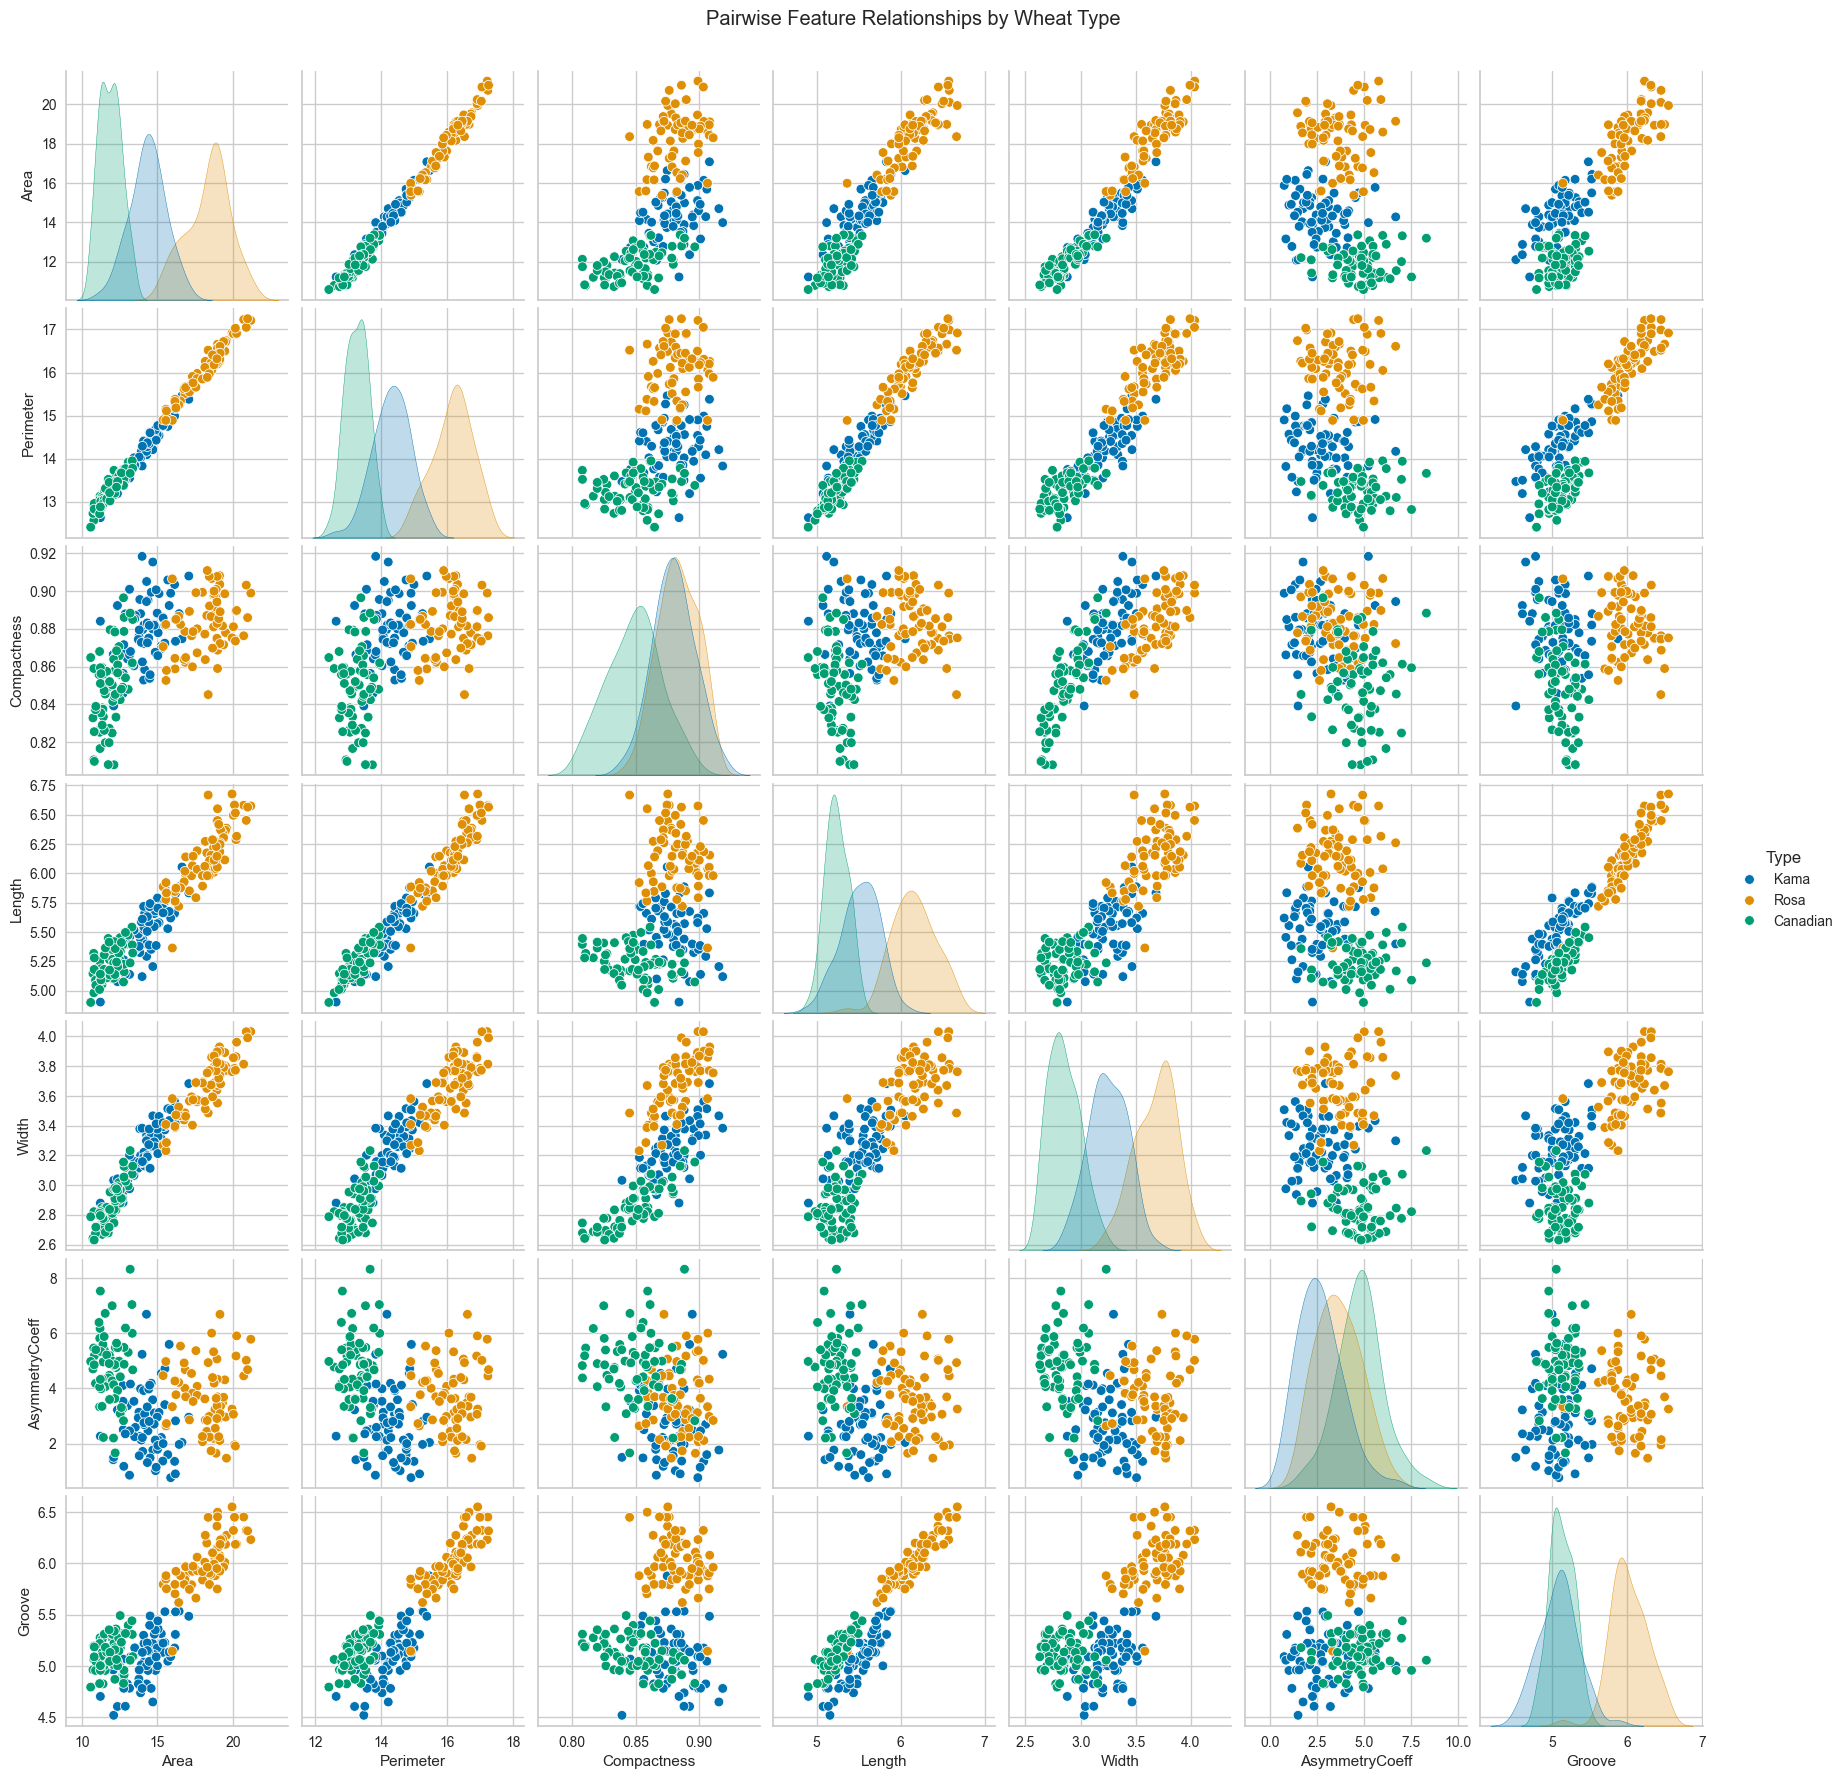

In [11]:
# Map Type codes to labels
df_temp_2 = df.copy()
df_temp_2["Type"] = df_temp_2["Type"].map({1: "Kama", 2: "Rosa", 3: "Canadian"})

# Pairplot using the mapped labels
sns.pairplot(df_temp_2, hue="Type", diag_kind="kde", palette="colorblind")
plt.suptitle("Pairwise Feature Relationships by Wheat Type", y=1.02)

plt.show()

The pairplot provides insights into the relationships between different wheat **kernel features** (Area, Perimeter, Compactness, Length, Width, AsymmetryCoeff, Groove) across the **three wheat types** (Kama, Rosa, Canadian).

**Key Insights from Pairplot**

- **Size-related features (Area, Perimeter, Length, Width):**  
  These features show strong **positive linear relationships, where as one increases, the others tend to increase.** A clear size order can be observed: Canadian kernels (green) are generally smaller, followed by Kama (orange), with Rosa (blue) being the largest.  

- **Groove:**  
  This feature shows the **clearest separation** among wheat types, with well-formed clusters and very few overlaps. It is a strong discriminative feature for classification.  

- **AsymmetryCoeff:**  
  Provides **moderate separability.** Although there is overlap, Rosa tends to form a slightly more distinct cluster compared to Kama and Canadian.

  
- **Compactness:**  
  Shows **heavy overlap** across all three wheat types, especially when **paired with AsymmetryCoeff and Groove.** It does not clearly separate clusters on its own, but may still contribute in combination with other features.  

### Correlation Matrix on Numerical Features 

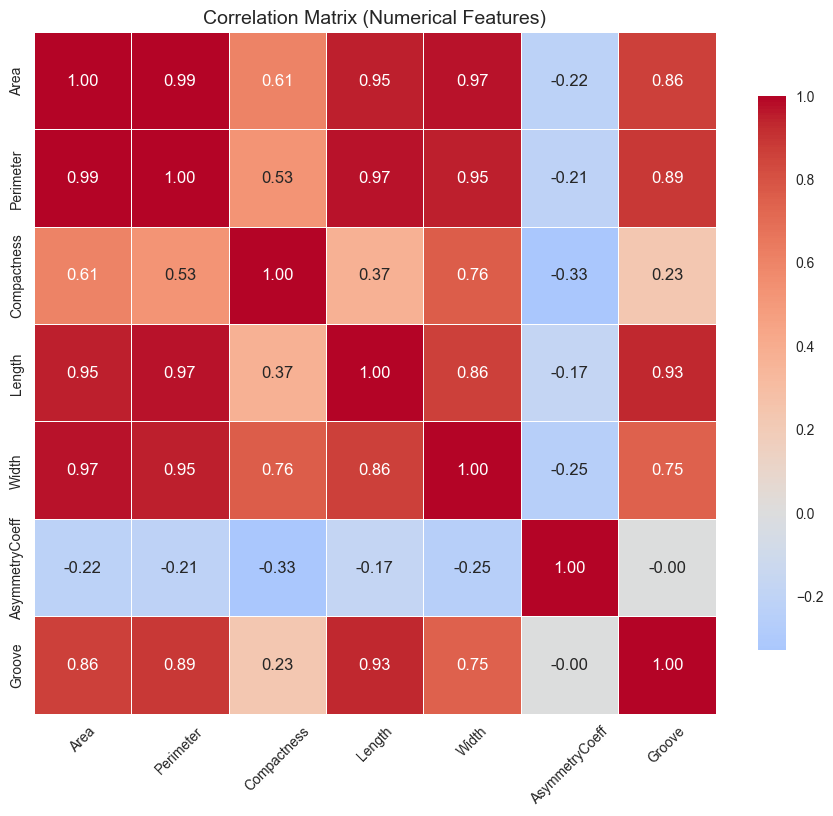

In [12]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = numeric_cols.drop('Type') if 'Type' in numeric_cols else numeric_cols

# Compute correlation matrix for numeric columns
corr = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(11, 9))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f", 
            linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.title("Correlation Matrix (Numerical Features)", fontsize=14)
plt.show()

In [13]:
# Select only numeric columns, excluding "Type"
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = numeric_cols.drop('Type') if 'Type' in numeric_cols else numeric_cols

# Compute correlation matrix only for numeric columns 
corr = df[numeric_cols].corr()
corr_df = corr.unstack().reset_index()

# Rename columns
corr_df.columns = ['Feature_1', 'Feature_2', 'Correlation']

# Remove self-correlations (feature is correlated with itself)
corr_df = corr_df[corr_df['Feature_1'] != corr_df['Feature_2']]

# Sort by correlation descending
corr_df = corr_df.sort_values(by='Correlation', ascending=False)

# Drop duplicate pairs (each pair appears once)
corr_df = corr_df.drop_duplicates(subset=['Correlation'])

# Show correlations in DataFrame
corr_df

,Feature_1,Feature_2,Correlation
1,Area,Perimeter,0.994437
10,Perimeter,Length,0.972944
4,Area,Width,0.970980
3,Area,Length,0.951126
11,Perimeter,Width,0.945496
45,Groove,Length,0.932124
43,Groove,Perimeter,0.889543
6,Area,Groove,0.862727
31,Width,Length,0.862680
18,Compactness,Width,0.762167


The correlation matrix quantifies the **strength and direction of linear relationships between wheat kernel features.** A value close to **1** indicates a **strong positive correlation,** while values near **0** suggest **little or weak correlation,** and **negative values indicate an inverse relationship.**

**Key Insights from Correlation Matrix**

- **Strong Positive Correlations:**  
  - **Area, Perimeter, Length, and Width are very strongly correlated (r > 0.95).** These size-related features are highly dependent on one another, which suggests multicollinearity.  
  - **Groove** shows very **strong correlation with Length (0.93), strong correlation with Perimeter (0.89), and with Area (0.86).** This means that as Groove increases, Length, Perimeter, and Area also tend to increase.  

- **Moderate Correlations:**  
  - **Compactness** shows **moderate correlation with Width (0.76) and Area (0.61),** but **weaker relationships with Length (0.37) and Groove (0.23).** 

- **Weak or Negative Correlations:**  
  - **AsymmetryCoeff** has a **weak negative correlations with most features (e.g., with Compactness at -0.33, Width at -0.25, Area at -0.22).** This suggests it captures a different, shape-related property of the kernels.  

**Summary:**  
- Size-related features may introduce **multicollinearity** and could be reduced through dimensionality reduction techniques.  
- **Groove and Compactness** provide additional value beyond pure size measurements.  
- **AsymmetryCoeff** shows weak or negative correlations with most features, suggesting it captures different shape-related characteristics.  

### Skewness Analysis of Continuous Features (with Histogram Visualisations)

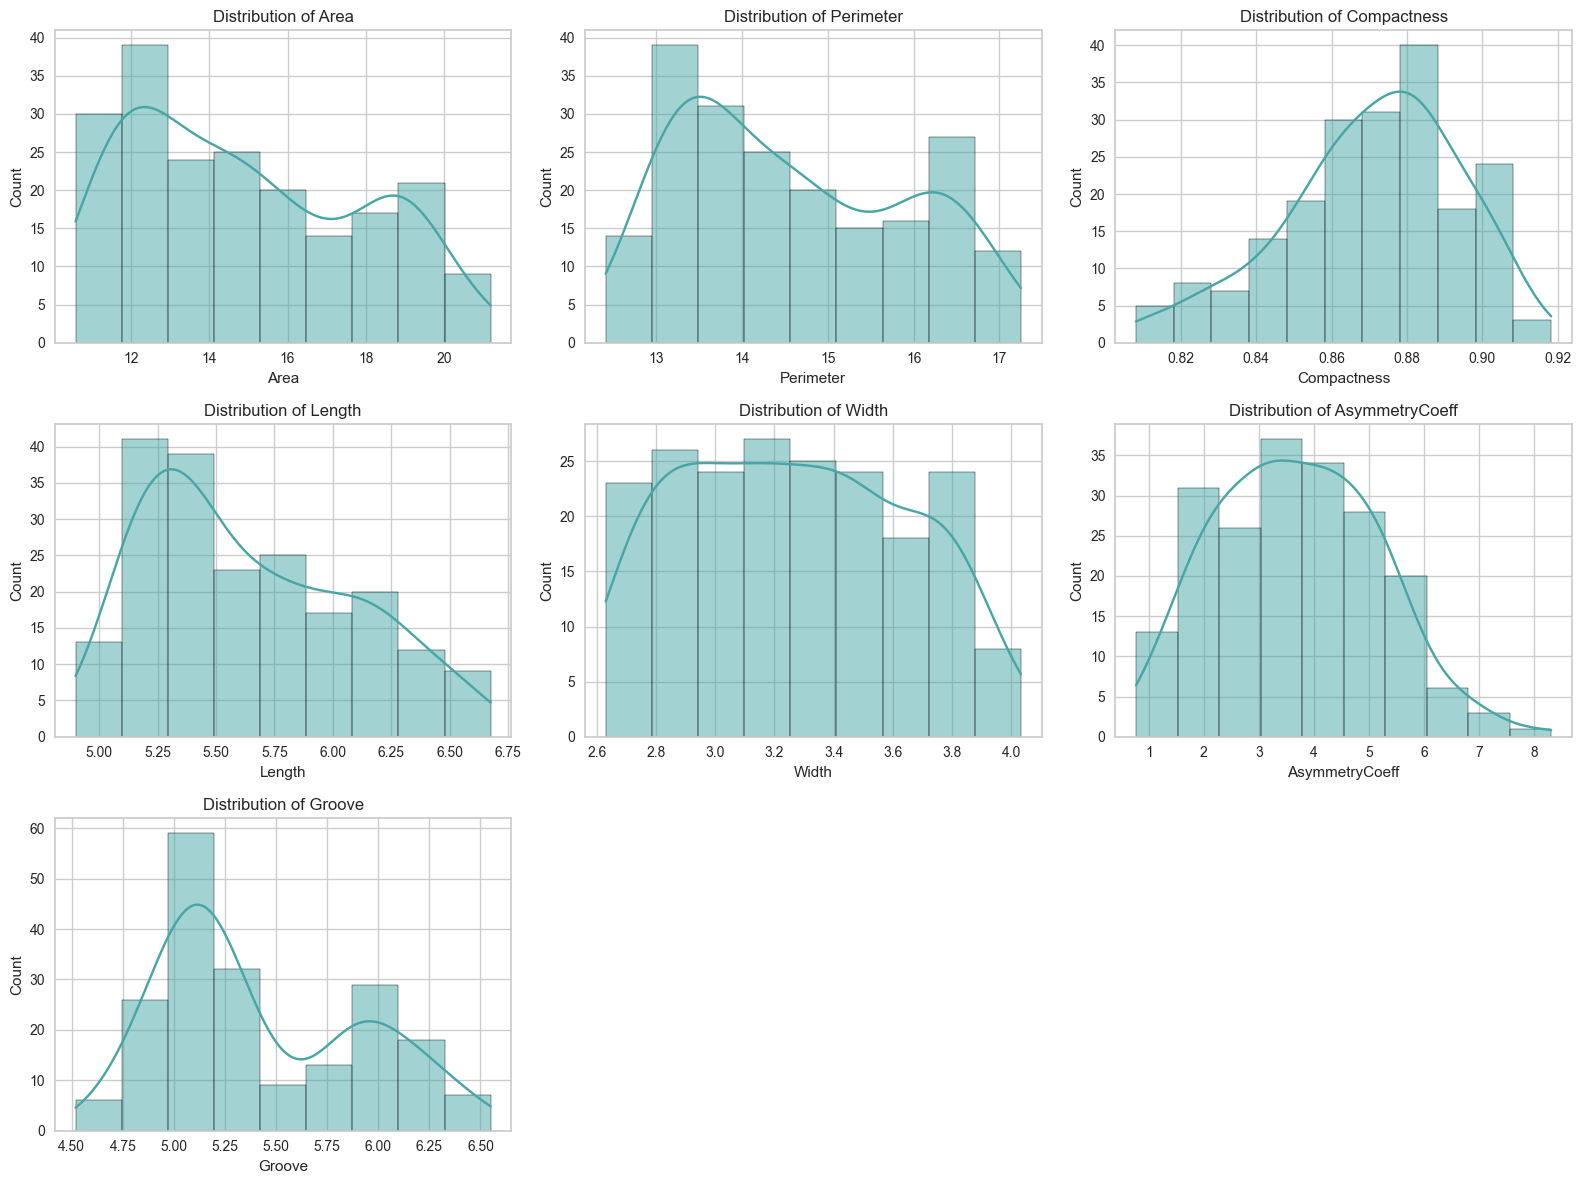

In [14]:
# Define continuous columns
continuous_columns = ["Area", "Perimeter", "Compactness", "Length", "Width", "AsymmetryCoeff", "Groove"]

# Plot histogram
plt.figure(figsize=(16, 12))

for i, column in enumerate(continuous_columns, 1):
    plt.subplot(3, 3, i)  # 3x3 grid, adjust as needed
    sns.histplot(df[column], kde=True, color="#48A6A7", edgecolor="black")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [15]:
# Define continuous columns
continuous_columns = ["Area", "Perimeter", "Compactness", "Length", "Width", "AsymmetryCoeff", "Groove"]

# Loop through continuous columns
for column in continuous_columns:
    
    # Check if column exists in the dataframe
    if column in df.columns:
        
        # Calculate skewness
        skewness = skew(df[column])
        
        # Print interpretation based on skewness
        if skewness <= -1:
            print(column, "has highly negative skewness.\nIndicating it is a left-skewed distribution where most of the data values are concentrated on the right.\n")
        elif -1 < skewness <= -0.5:
            print(column, "has moderately negative skewness.\nIndicating it is a left-skewed distribution where the data values are greatly concentrated on the right.\n")
        elif -0.5 < skewness < 0.5:
            print(column, "is approximately symmetric.\nIndicating that it is a symmetrical distribution with approximately zero skewness.\n")
        elif 0.5 <= skewness < 1:
            print(column, "has moderately positive skewness.\nIndicating it is a right-skewed distribution where most of the data values are concentrated on the left.\n")
        elif skewness >= 1:
            print(column, "has highly positive skewness.\nIndicating it is a right-skewed distribution where the data values are greatly concentrated on the left.\n")

Area is approximately symmetric.
Indicating that it is a symmetrical distribution with approximately zero skewness.

Perimeter is approximately symmetric.
Indicating that it is a symmetrical distribution with approximately zero skewness.

Compactness has moderately negative skewness.
Indicating it is a left-skewed distribution where the data values are greatly concentrated on the right.

Length is approximately symmetric.
Indicating that it is a symmetrical distribution with approximately zero skewness.

Width is approximately symmetric.
Indicating that it is a symmetrical distribution with approximately zero skewness.

AsymmetryCoeff is approximately symmetric.
Indicating that it is a symmetrical distribution with approximately zero skewness.

Groove has moderately positive skewness.
Indicating it is a right-skewed distribution where most of the data values are concentrated on the left.



## Task 2: Train, validate and develop a Machine Learning pipeline using PyCaret

In [16]:
# Initialise setup with experiment logging
cfl = setup(
    data=df,
    target='Type',
    session_id=123,
    normalize=True,                     # scale features
    normalize_method='zscore',          
    remove_multicollinearity=True,      # remove highly correlated features
    multicollinearity_threshold=0.98,   # correlation threshold to drop features
    log_experiment=True,                # Enable experiment logging
    experiment_name='wheat_experiment'  # Experiment name
)

,Description,Value
0,Session id,123
1,Target,Type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(199, 8)"
5,Transformed data shape,"(199, 7)"
6,Transformed train set shape,"(139, 7)"
7,Transformed test set shape,"(60, 7)"
8,Numeric features,7
9,Preprocess,True


2025/08/28 00:53:28 INFO mlflow.tracking.fluent: Experiment with name 'wheat_experiment' does not exist. Creating a new experiment.


The training environment is initialised using PyCaret's **setup()** function with the following configurations:  

- **Target column:** Type  
- **Normalisation:** Enabled using **z-score** method  
- **Multicollinearity removal:** Enabled with a threshold of **0.98**  
- **Experiment logging:** Enabled with experiment name **"wheat_experiment"** to track model training

In [17]:
# Access X_train_transformed
get_config('X_train_transformed')

,Perimeter,Compactness,Length,Width,AsymmetryCoeff,Groove
183,-1.248318,0.411534,-1.226279,-0.835958,-0.137477,-0.651631
8,0.475635,0.771173,0.507412,0.640798,-1.236218,0.185052
80,1.604321,0.348071,1.618635,1.432681,-0.566040,1.545444
128,0.537480,-0.227348,0.417500,0.346516,0.314033,0.731713
108,1.527015,0.102671,1.371952,1.261463,1.944597,1.270027
...,...,...,...,...,...,...
130,0.869902,0.369225,1.109132,0.825392,-0.185395,1.098935
75,0.707557,0.821944,0.429027,0.803990,-0.636230,0.629474
195,-1.356549,-0.790074,-1.207835,-1.258653,0.353852,-0.920788
31,-0.173747,-0.713915,0.122404,-0.212617,0.080516,-0.303187


This is to access the transformed training features after **setup()**. The data has undergone **normalisation** and **multicollinearity removal**.


### Compare Models (Training)

In [18]:
# Compare models using 10-fold CV and sort by "F1-Score"
best_model = compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9714,0.0000,0.9714,0.9769,0.9714,0.9572,0.9599,0.0310
ridge,Ridge Classifier,0.9714,0.0000,0.9714,0.9767,0.9712,0.9570,0.9598,0.0350
qda,Quadratic Discriminant Analysis,0.9566,0.0000,0.9566,0.9622,0.9565,0.9348,0.9377,0.0340
gbc,Gradient Boosting Classifier,0.9571,0.0000,0.9571,0.9652,0.9559,0.9357,0.9403,0.2640
et,Extra Trees Classifier,0.9429,0.9962,0.9429,0.9529,0.9414,0.9145,0.9200,0.1470
ada,Ada Boost Classifier,0.9352,0.0000,0.9352,0.9450,0.9351,0.9028,0.9077,0.1060
rf,Random Forest Classifier,0.9357,0.9953,0.9357,0.9469,0.9340,0.9036,0.9100,0.1750
svm,SVM - Linear Kernel,0.9346,0.0000,0.9346,0.9477,0.9328,0.9020,0.9093,0.0380
lr,Logistic Regression,0.9346,0.0000,0.9346,0.9444,0.9323,0.9021,0.9081,1.3470
lightgbm,Light Gradient Boosting Machine,0.9280,0.9970,0.9280,0.9437,0.9273,0.8923,0.9002,0.2090


Using **compare_models** to return the single best-performing model based on the metric defined in the **sort parameter (F1)**, which balances both **precision** and **recall**.

### Tune Best Model

In [19]:
best_model_tuned = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9286,0.0000,0.9286,0.9429,0.9286,0.8931,0.9000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9286,0.0000,0.9286,0.9429,0.9286,0.8931,0.9000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9286,0.0000,0.9286,0.9405,0.9278,0.8923,0.8993
7,0.9286,0.0000,0.9286,0.9429,0.9286,0.8931,0.9000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Evaluate Best Model (Linear Discriminant Analysis)

### Classification Report

In [20]:
# Original training labels
y_train_orig = get_config('y_train')  

# Transformed training labels
y_train_trans = get_config('y_train_transformed')  

# Create mapping
mapping = pd.DataFrame({
    'Original': y_train_orig,
    'Encoded': y_train_trans
}).drop_duplicates().reset_index(drop=True)

mapping

,Original,Encoded
0,3,2
1,1,0
2,2,1


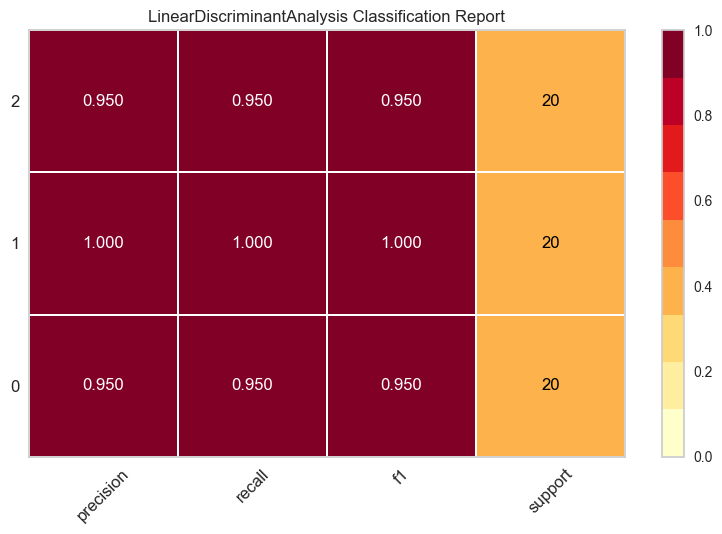

In [21]:
# Classification Report
plot_model(best_model, plot = 'class_report')

**Classification Report Analysis**

This classification report evaluates the **Linear Discriminant Analysis model's performance in predicting three wheat seed types** (Kama, Rosa, Canadian) using **key metrics: precision, recall, F1-score, and overall accuracy.**  

**Class Mapping:**  
- 1 -> Kama (encoded 0)  
- 2 -> Rosa (encoded 1)  
- 3 -> Canadian (encoded 2)  

**1) Precision:** Measures how many of the predicted instances for a class are actually correct.  
- **Kama (Class 0):** 0.95 -> 95% of the samples **predicted as Kama were correctly classified.**  
- **Rosa (Class 1):** 1.00 -> 100% of the samples **predicted as Rosa were correctly classified.**  
- **Canadian (Class 2):** 0.95 -> 95% of the samples **predicted as Canadian were correctly classified.**  

**2) Recall (Sensitivity):** Measures how many actual instances of a class were correctly identified by the model.  
- **Kama:** 0.95 -> 95% of the actual Kama samples were **correctly identified, with 5% misclassified.**  
- **Rosa:** 1.00 -> All actual Rosa samples were **correctly classified.**  
- **Canadian:** 0.95 -> 95% of the actual Canadian samples were **correctly classified, with 5% misclassified.**  

**3) F1-Score:** Harmonic mean of precision and recall, providing a balance between the two.  
- **Kama:** 0.95 -> Shows a **very strong balance between precision and recall.**  
- **Rosa:** 1.00 -> Indicates a **perfect balance between precision and recall.**  
- **Canadian:** 0.95 -> Reflects a **very strong balance between precision and recall.**  

**4) Overall Accuracy (0.97):**  
- The model correctly predicted **97% of all test samples.**  
- Misclassifications are minimal, mainly in **Kama and Canadian**, as indicated by their slightly lower precision and recall.

### Confusion Matrix

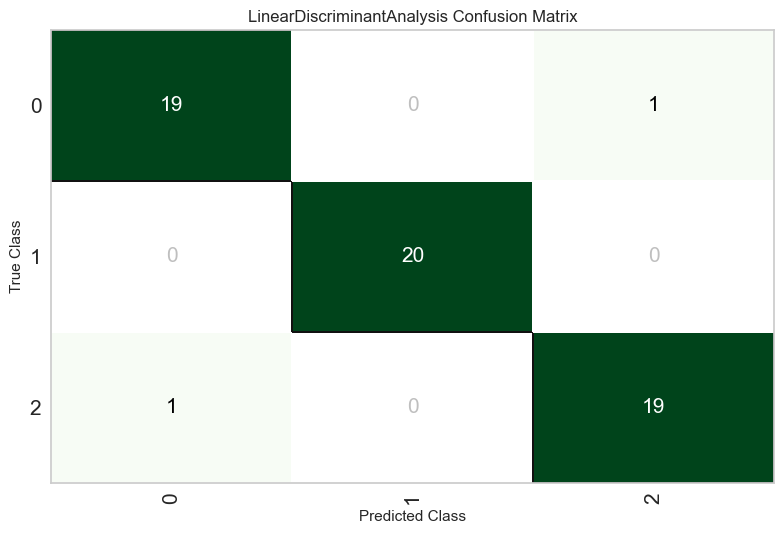

In [22]:
# Confusion matrix
plot_model(best_model, plot = 'confusion_matrix')

**Confusion Matrix:**

**1) Kama (Class 0):**

- **True Positives (TP -> 19):** 19 Kama samples correctly predicted.  
- **False Negatives (FN -> 1):** 1 Kama sample misclassified as Canadian.  
- **False Positives (FP -> 1):** 1 Canadian sample incorrectly predicted as Kama.  

**2) Rosa (Class 1):**

- **True Positives (TP -> 20):** 20 Rosa samples correctly predicted.  
- **False Negatives (FN -> 0):** No Rosa samples misclassified.  
- **False Positives (FP -> 0):** No samples from other classes incorrectly predicted as Rosa.  

**3) Canadian (Class 2):**

- **True Positives (TP -> 19):** 19 Canadian samples correctly predicted.  
- **False Negatives (FN -> 1):** 1 Canadian sample misclassified as Kama.  
- **False Positives (FP -> 1):** 1 Kama sample incorrectly predicted as Canadian.  

Overall, the model demonstrates **strong performance across all three classes**, with **minor misclassifications between Kama and Canadian**.

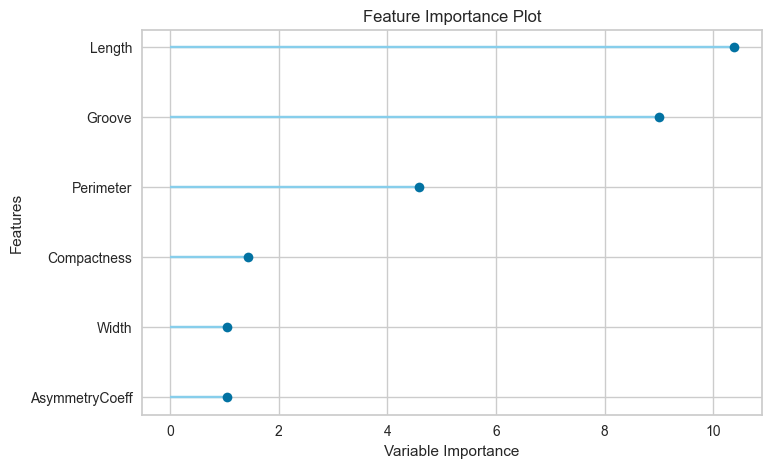

In [23]:
# Feature importance
plot_model(best_model, plot = 'feature')

The feature importance plot for the **Linear Discriminant Analysis model** indicates that **Length** is the **most influential feature, followed by Groove and Perimeter.** These three features are the **top contributors to the model’s predictions.**

### ROC-AUC Curve

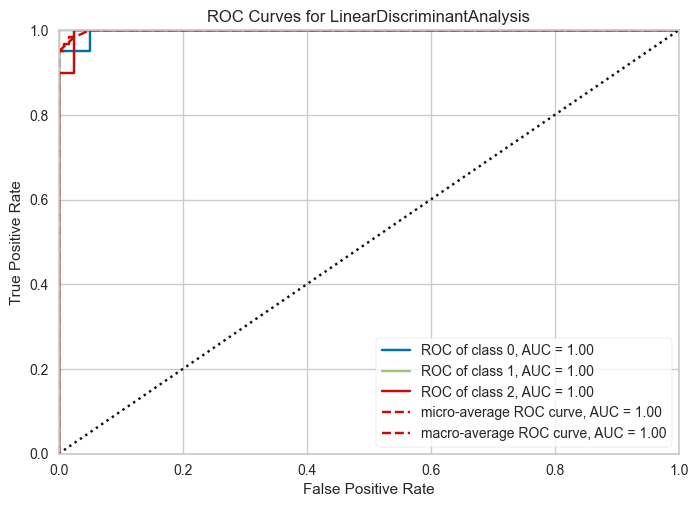

In [24]:
plot_model(best_model, plot ='auc')

The **ROC** curve is a graphical representation used to evaluate the performance of a classification model, **plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.**

An AUC (Area Under the Curve) of 1.00 for all classes indicates **perfect separability,** meaning the model can **perfectly distinguish between Kama, Rosa, and Canadian wheat.**

### Evaluate Best Model

In [25]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Prediction (Test Set)

In [26]:
# Predict on test set
holdout_pred = predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.9667,0.9983,0.9667,0.9667,0.9667,0.9500,0.9500


In [27]:
# Show first few rows of predictions
holdout_pred.head()

,Area,Perimeter,Compactness,Length,Width,AsymmetryCoeff,Groove,Type,prediction_label,prediction_score
84,21.180000,17.209999,0.8989,6.573,4.033,5.780,6.231,2,2,1.0000
9,15.260000,14.850000,0.8696,5.714,3.242,4.543,5.314,1,1,0.9948
69,19.110001,16.260000,0.9081,6.154,3.930,2.936,6.079,2,2,1.0000
141,12.490000,13.460000,0.8658,5.267,2.967,4.421,5.002,3,3,0.7047
114,20.030001,16.900000,0.8811,6.493,3.857,3.063,6.320,2,2,1.0000


Using the **predict_model** function, predictions were generated on the **test set.** The model achieved an **accuracy of 0.97 and an F1-Score of 0.97, indicating strong performance on unseen data.**

### Finalise Model

In [28]:
# finalise model (train again on full dataset)
final_model = finalize_model(best_model)

The **finalize_model** function **retrains the best-performing model on the entire dataset, including the hold-out set,** to prepare it for deployment or production use.

### Save Pipeline

In [29]:
# save pipeline
save_model(final_model, 'wheat_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Area', 'Perimeter', 'Compactness',
                                              'Length', 'Width',
                                              'AsymmetryCoeff', 'Groove'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_va...
                                     transformer=RemoveMulticollinearity(threshold=0.98))),
                 ('normalize',
                  TransformerWrapper(exclude=None, include=None,
                                     t

In [30]:
# load pipeline
loaded_pipeline = load_model('wheat_pipeline')
loaded_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\TZEHSU~1\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Area', 'Perimeter', 'Compactness',
                                             'Length', 'Width',
                                             'AsymmetryCoeff', 'Groove'],
                                    transformer=SimpleIm...
                                    transformer=RemoveMulticollinearity(threshold=0.98))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=StandardScaler(copy=True,
                                                               with_mean=True,
                                                               with_std=True))),
                ('actual_estimator',
                 LinearDiscriminantAnalysis(covariance_estimator=None,
                                            n_components=None, priors=None,
                                            shrinkage=None, solver='svd',
                                            store_covariance=False,
                                            tol=0.0001))],
         verbose=False)

The **save_model** function saves the **entire trained pipeline to disk,** allowing it to be loaded and used later for predictions or deployment.

### Register Model with MLFlow

In [31]:
# End the currently active run
mlflow.end_run()

# Run mlflow
with mlflow.start_run(run_name="wheat_pipeline"):
    mlflow.sklearn.log_model(
        sk_model=loaded_pipeline,       # use the pipeline object
        artifact_path="pycaret-model",
        registered_model_name="Wheat_Seeds_Classification_Model"
    ) 

Registered model 'Wheat_Seeds_Classification_Model' already exists. Creating a new version of this model...
2025/08/28 00:55:12 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: Wheat_Seeds_Classification_Model, version 5
Created version '5' of model 'Wheat_Seeds_Classification_Model'.


### Experiment in MLFlow

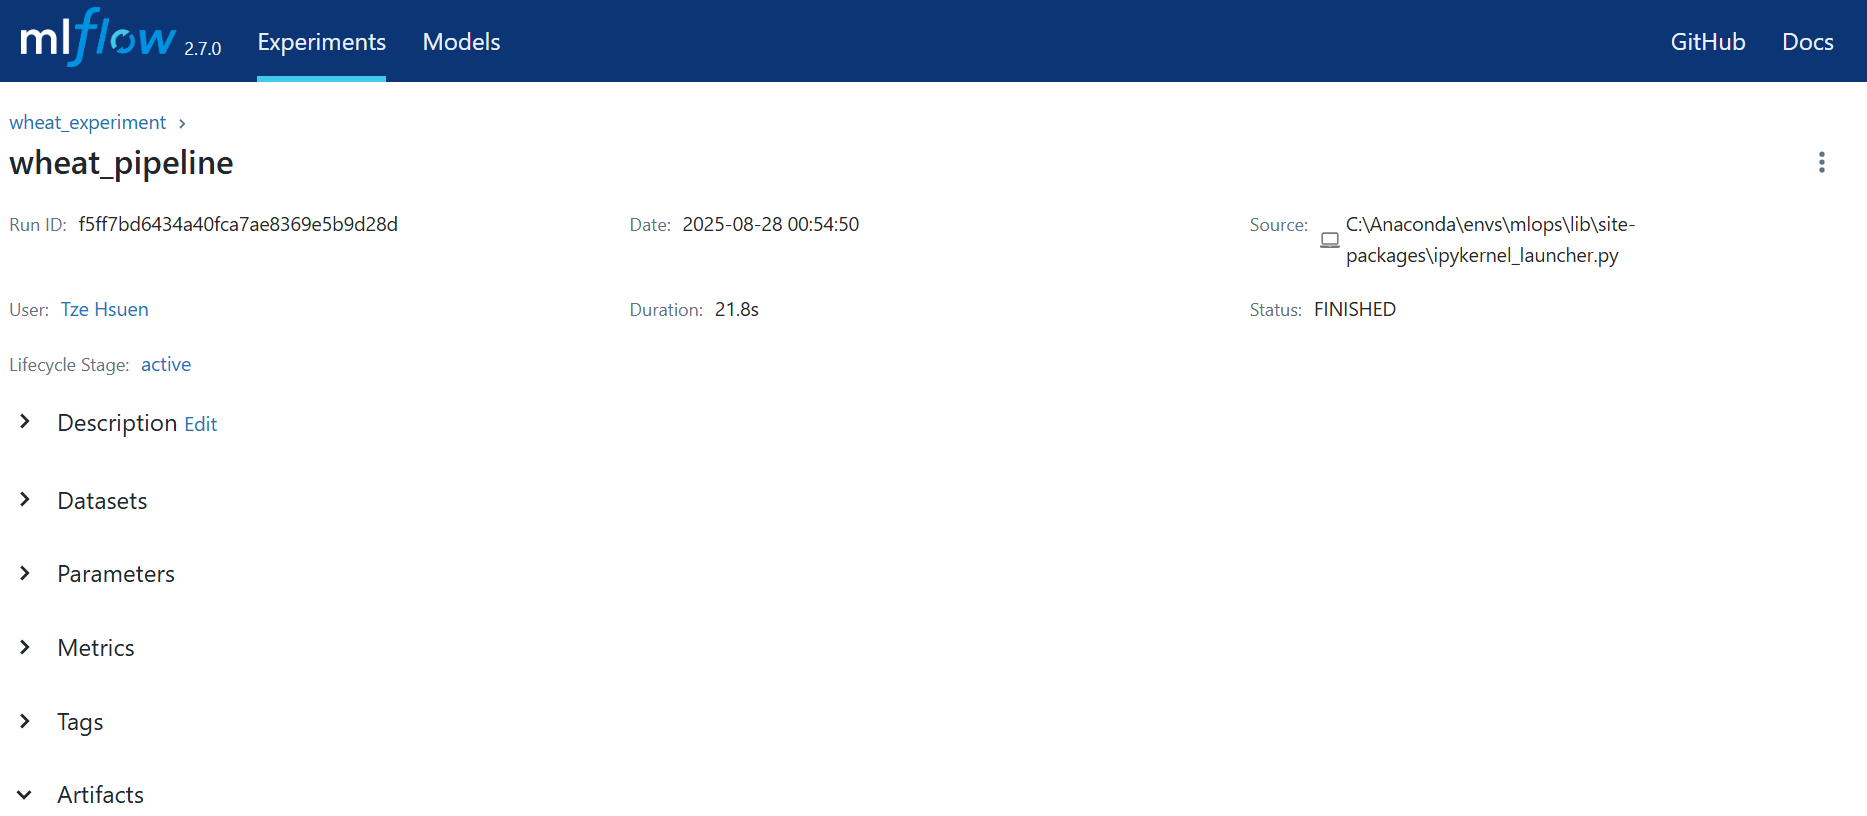

### Evaluation Metrics Across Trained Models

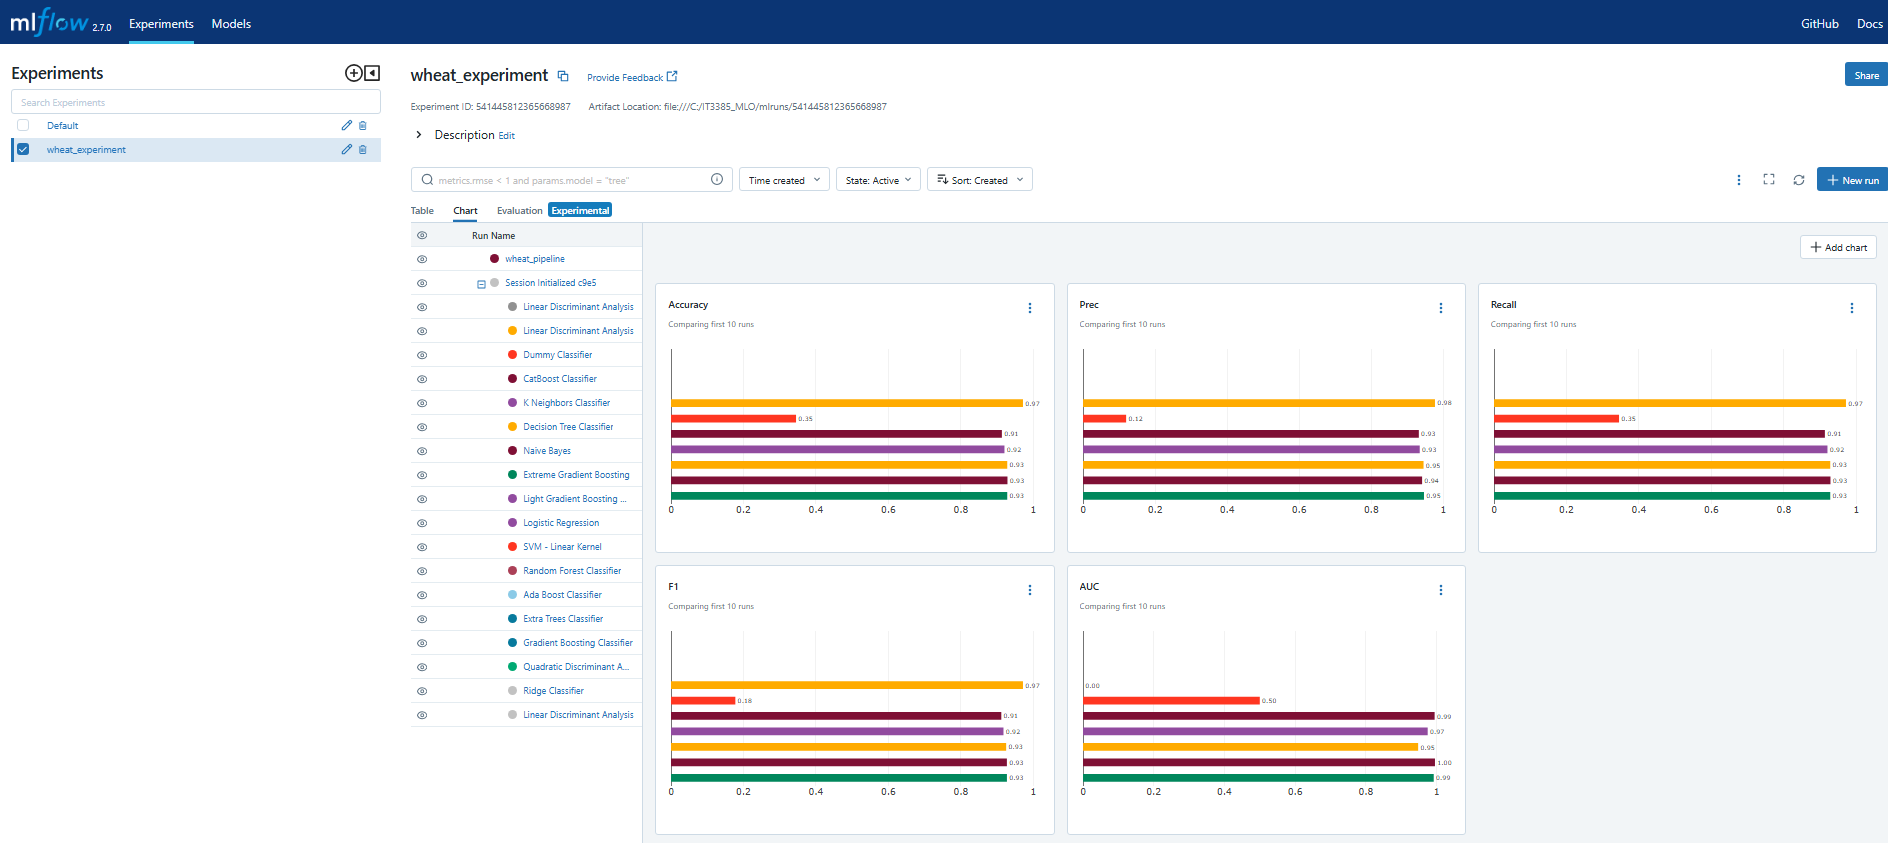

### Best Performing Model Metrics

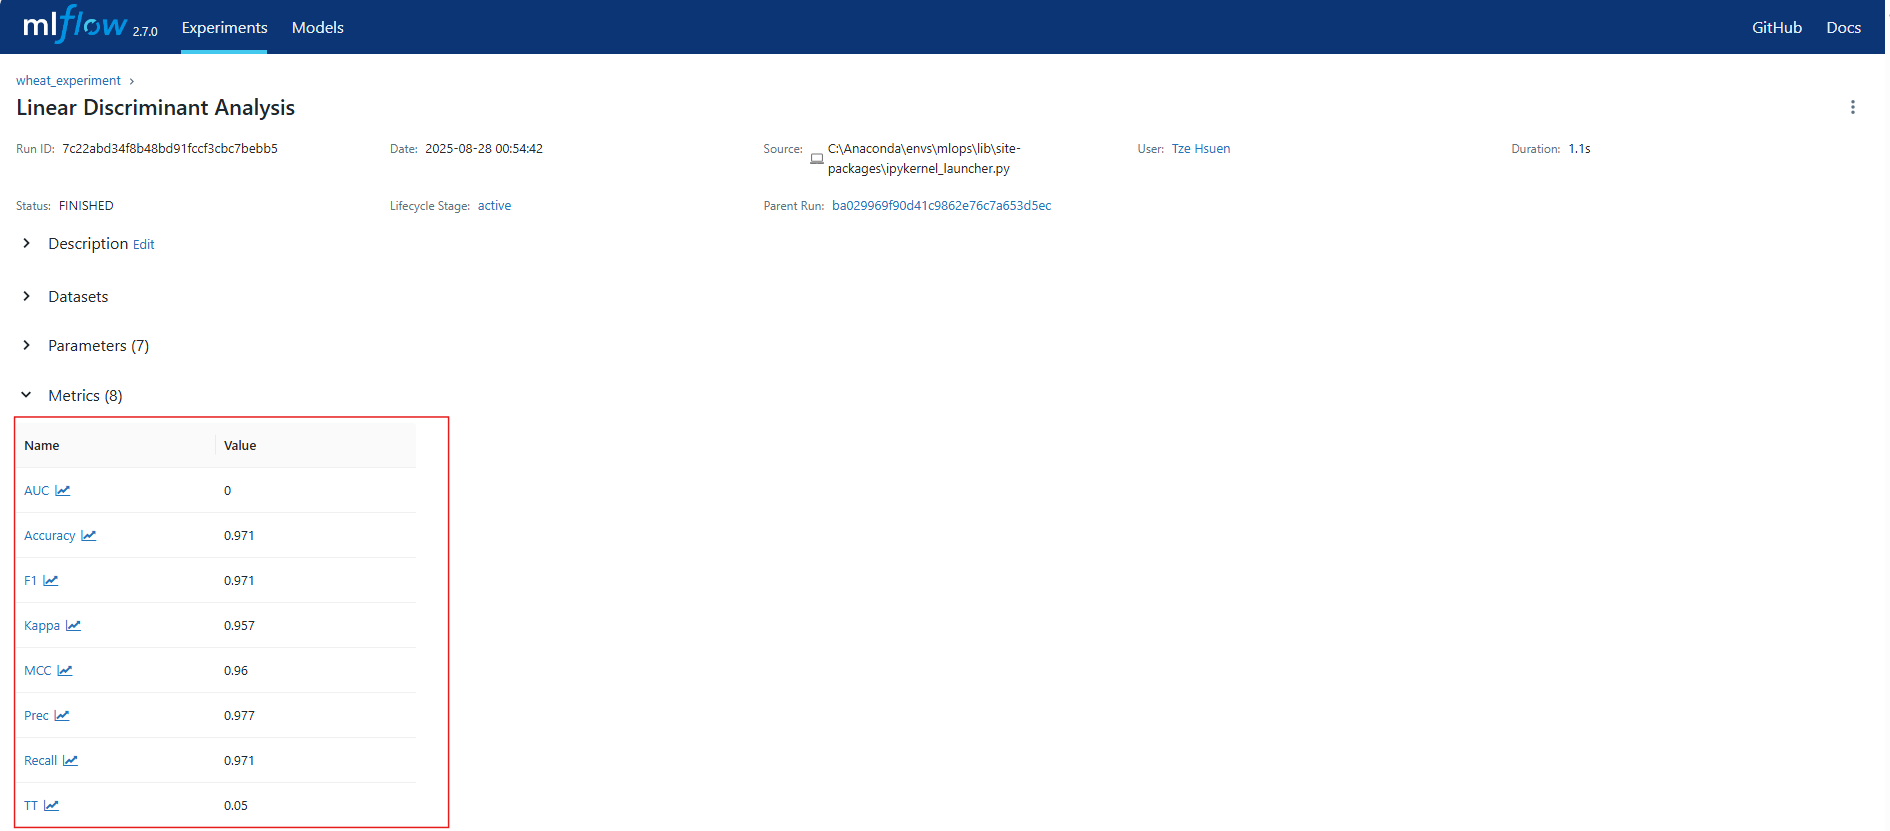

### Registered Best Model in MLFlow

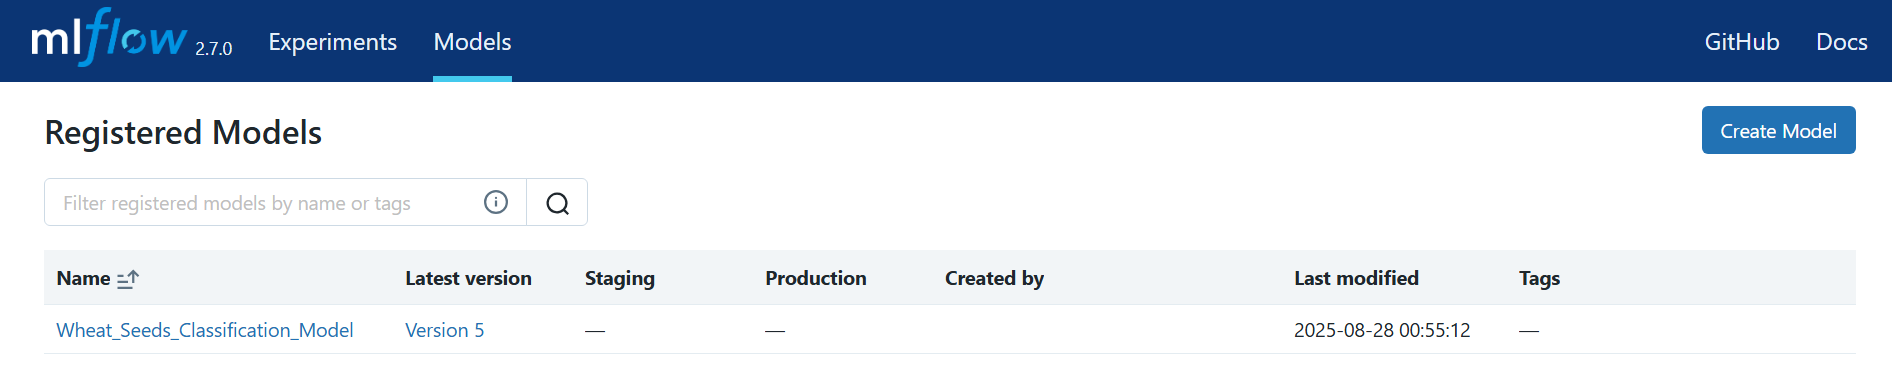

The **MLflow interface** shows that the **"Wheat_Seeds_Classification_Model" has been successfully registered** and can be found under the "Registered Models" section.